---
Zurück zur Übersicht | [Inhalt](00_Inhalt.ipynb)

---

In [58]:
# Für diese Notebook benötigte Pakete:
import numpy as np
import matplotlib.pyplot as plt

# Stationäre Messsysteme

Wir benutzen Messsysteme, um eine Messgröße in einen Messwert umzuführen. Hierbei werden wir den realen, echten Wert der Messgröße jedoch nie erfahren (Damit befassen wir uns im Kapitel  [Messabweichungen](Messabweichungen.ipynb)). 
Ein Messwert kann direkt vom Messgerät angezeigt werden, beispielsweise über ein Display, oder er steht als Datenwert in analoger oder digitaler Form zur Verfügung, welcher mit entsprechenden Geräten oder Algorithmen weiterverarbeitet werden muss. 

In diesem Kapitel wollen wir uns mit den Begrifflichkeiten und Kenngrößen eines Messsystems befassen. Hierbei nehmen wir vorerst an, dass sich die Messwerte über die Zeit während des Messprozesses nicht ändern. Diese Art von Messsystemen werden *statische Messsysteme* genannt. 

## Inhalt
***

### [Grundstruktur](#Sec-Grundstruktur)

### [Kennlinie](#Sec-Kennlinie)
* [Statische Kenngrößen](#SubSec-Statische_Kenngrößen)
* [Beispiel](#SubSec-Beispiel)
* [Wunder an Empfindlichkeit: LIGO](#SubSec-Wunder_an_Empfindlichkeit)
* [Gesamtkennlinie](#SubSec-Gesamtkennlinie)
* [Herabsetzen des Messbereichs](#SubSec-Herabsetzen_des_Messbereichs)

### [Reale Kennlinienfunktion: Übergang zu Messabweichungen](#Sec-Reale_Kennlinienfunktion)
* [Kennlinienfehler](#SubSec-Kennlinienfehler)

### [Zusammenfassung](#Sec-Zusammenfassung)

***

## Grundstruktur 
<a id="Sec-Grundstruktur"></a>

Die generelle Struktur eines Messsystems kann wiefolgt dargestellt werden:

![image.png](pictures/grundstruktur.png)

Dies ist einer der ersten Messketten, die wir kennenlernen. Allgemein findet man immer wieder die gleichen Komponenten in solchen Ketten, die im folgenden aufgelistet werden:

* **Aufnehmer/Sensor** (auch Messgrößenaufnehmer genannt): Die Erfassung der physikalischen Messgröße, $u$, wird mit einem entsprechend geeigneten *Sensor* realisiert. Mit konkreten Sensoren werden wir uns noch am Ende der Vorlesung genauer beschäftigen. Einige Beispiele werden uns aber während der kompletten Veranstaltung immer mal wieder begneten. Ein Sensor nimmt eine Messgröße auf, z.B. die Umbegungstemperatur, wandelt diese beispielsweise in eine Widerstandänderung um, welche wiederum in ein weiterverarbeitungsfähigen Signals (hier elektrisch) mit einer geeigneten Schaltung umgewandelt wird. 
* **Verstärkung**: An dieser Stelle startet die Messsignalverarbeitung. Da das elektrische Primärsignal mitunter sehr  klein sein kann, muss es deshalb vielleicht noch verstärkt werden, bevor es einer Digitalisierung zugeführt werden kann.
* **Anpassung** (optional): Die meist elektrische Größe wird in einen darstellbaren Messwert umgewandelt. Hierfür werden Messschaltungen mit Messverstärken oder Computern verwendet.
* **Messwertausgabe** (diverse): Anzeige, Registrierung, Speicherung, Dokumentation in analoger oder digitaler Form können an dieser Stelle in die Messkette implementiert werden.
* **Digitalisierung**: Dies ist die häufigste Art der *Messwertausgabe*. Das analog vorliegende elektrische Signal wird in ein Digitalwort umgewandelt. 
* **Digitale Signelverarbeitung**: Durch Algorithmik wird der Messwert digital weiterverarbeitet. Häufig können an dieser Stelle auch Korrekturen vorgenommen werden, um beispielsweise Kennenlinienfehler zu minimieren und zu korrigieren. Dies werden wir gleich noch genauer betrachten. Ausgegeben wird schließlich ein Messwert $y$.

***
## Kennlinie
<a id="Sec-Kennlinie"></a>

Jede einzelne der Komponenten führt die an ihr anliegenden Eingangssignal in Ausgangssignale über. Wie diese Überführung genau aussieht beschreibt die sogenannte **Kennlinie**, die für jede Komponente unterschiedlich aussehen kann. Im folgenden Bild ist beispielshaft eine lineare Kennlinie dargestellt:

![image.png](pictures/kennlinie.png)

### Statische Kenngrößen
<a id="SubSec-Statische_Kenngrößen"></a>

Für jede Eingangsgröße $u$ wird anhand der Kennlinie eine Ausgangsgröße $y$ definiert. Beispielsweise wird anhand der Kennlinie eine Temperatursensors ein bestimmter Temperaturwert in eine Spannung umgewandelt. 

* Der Bereich, indem der Sensor beispielsweise noch korrekt arbeitet (meist vom Hersteller garantiert) wird **Messbereich (engl. range)** genannt und wird durch den minimal und maximal möglichen Wert, der noch als Eingang angelegt werden kann oder darf, angegeben. Im Falle eines Temperatursensors wäre ein typische Messbereich z.B. -40°C bis 120°C. 
* Die Differenz zwischen diesen Maximal- und Minimalwert nennt man **Spanne (engl. span)** (bezogen auf unser Beispiel also 160°C). 
* Die Spanne ist mit einem Bereich auf der y-Achse korreliert, nämlich dem sogenannten **Vollbereichssignal (engl. full scale output = FSO)**.
* Der **Übertragungsfaktor $k$** oder auch oft *Verstärkung* genannt beschreibt die Überführung des Eingangssignals der Messeinrichtung, also der Messgröße, in ein Ausgangssignal:

$$y = k \cdot u$$

* Die **Statische Kennlinie** ist im Prinzip der *Übertragungsfaktor*, aber dieses Mal definiert für alle möglichen Eingangssignale.

$$y(u) = k \cdot u$$

Die Kennlinie sollte immer eine gewisse Steigung aufweisen. Oder man könnte auch sagen, dass wenn sich die Eingangsgröße $u$ ändert, dass dies auch immer eine Änderung in der Ausgangsgröße $y$ mit sich ziehen sollte. Im Falle einer Verstärkungseinheit könnte diese Änderung sogar vergrößert werden und das System reagiert somit *empfindlicher* auf Änderungen der Eingangsgröße. Mathematisch betrachtet bedeutet die Steilheit nichts anderes als die Steigung bzw. die Ableitung der Ausgangsgröße $y(u)$ an einer bestimmten Stelle $u$:

$$S(u) = \frac{\partial y(u)}{\partial u} = \frac{\partial f(u)}{\partial u}$$

Dies wird auch die Empfindlichkeit $S(u)$ genannt und entspricht der Tangente im Punkt $u$.



### Beispiel
<a id="SubSec-Beispiel"></a>

Reine Metalle sind **Kaltleiter**. Platin hat beispielsweise einen Widerstandswert von R0 = R(0) = 100 Ohm bei 0 °C, daher der Name PT100. Sie können bei geeigneter Ausrüstung bis 850 °C eingesetzt werden. Sie haben eine fast lineare Kennlinie bei einer relativen Widerstandsänderung von knapp 0,4 % pro °C:

$$R(T) = R_0 \cdot (1 + AT + BT^2)$$

Folgende Parameter gelten für bestimmte Temperaturbereiche:
* 0-850°C: A= 3,9e-3/°C, B=-5,7e-7/°C$^2$
* -200-0°C: C = -4,2e-1/°C$^4$

Thermistoren mit negativen Temperaturkoeffizienten (NTC = Negative thermal coefficient , Heißleiter) weisen aufgrund des zugrundeliegenden Halbleiter-Effektes eine hohe Abhängigkeit von Fehlstellen, wie der Dotierung der Grundstoffe auf. 
**Heißleiter** sind bis etwa 150 °C einsetzbar. 
Sie weisen gegenüber Platin-Messwiderständen eine deutlich höhere Empfindlichkeit auf:

$$ R(T)=R_{25} \cdot \mathrm e^{B\left(\frac{1}{T+273}-\frac{1}{298}\right)}$$

mit R25 = 1000 Ohm und B = 3528.

Ein Transition Edge Sensor (TES), bzw. auf deutsch Phasenübergangsthermometer, ist ein supraleitender Temperatursensor, der in der Lage ist, kleinste Temperaturänderungen im Bereich von wenigen 100 $\mu\mathrm K$ zu messen. Seine Umgebungstemperatur wird je nach Material auf wenige mK runtergekühlt, um das Material in einen supraleitenden Zustand (d.h. sein Widerstand verschwindet) zu bringen. Dies ist die sogenannte kritische Temperatur, $T_c$, aber der Materiale supraleitende Eigenschaften aufweisen. Die Widerstand wird über Anlegen einer Stromstärke minimal aufgeheizt, sodass sein Arbeitspunkt in den Übergang (die steile Flanke) geschoben wird. An diesem Punkt ist die Ableitung, und somit die Empfindlichkeit, maximal. 

$$ R(T)= \frac{a}{1 + \mathrm e^{-k(T-T_c)}} $$

mit z.B. $k$ = 1.86/mK, $a$ = 0.224 Ohm und $T_c$ = 103.2 mK

![image.png](pictures/bsp_kennlinie.png)

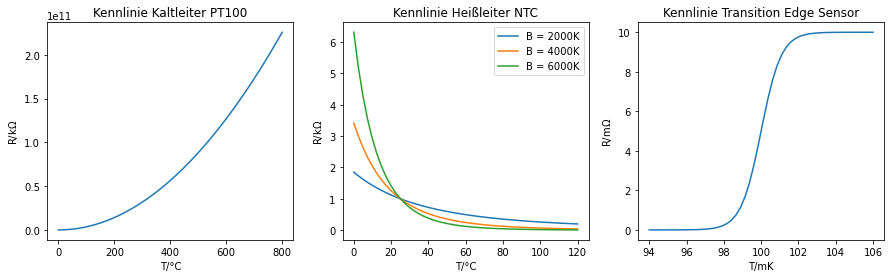

In [59]:
#--------- Kaltleiter PT100 -------------
T_PT = np.linspace(0, 800, num=800)
R_0 = 100 # in Ohm
A = 3.93e-3 # in 1/°C
B = -5.7e-7 # in 1/^C^2
def R_PT(T_PT):
    return R_0* (1 + A*T_PT + B * T_PT**2)

#--------- Heißleiter NTC -------------
T_NTC = np.linspace(0+273.15, 120+273.15, num=50)
R_25 = 1000 # in Ohm
T_25 = 25.0 + 273.15 # in Kelvin
B = 3528
def R_NTC(T_NTC, B):
    return R_25 * np.exp(B * (1/(T_NTC) - 1/T_25))

#--------- Transition Edge Sensor -------------
k = 1.86 # in 1/mK
a = 0.01 # in Ohm
Tk = 100 # in mK
T = np.linspace(94, 106, num=50)
def R(T):
    return a / (1+ np.exp(-k * (T-Tk)))


#--------- Diagramme -------------
f, axs = plt.subplots(1,3,figsize=(15,4))

axs[0].plot(T_PT,R_PT(T_PT))
axs[0].set_xlabel('T/°C')
axs[0].set_ylabel(r'R/k$\Omega$')
axs[0].set_title('Kennlinie Kaltleiter PT100')

axs[1].plot(T_NTC-273.15,R_NTC(T_NTC, 2000)/1000, label = "B = 2000K")
axs[1].plot(T_NTC-273.15,R_NTC(T_NTC, 4000)/1000, label = "B = 4000K")
axs[1].plot(T_NTC-273.15,R_NTC(T_NTC, 6000)/1000, label = "B = 6000K")
axs[1].set_xlabel('T/°C')
axs[1].set_ylabel(r'R/k$\Omega$')
axs[1].set_title('Kennlinie Heißleiter NTC')
axs[1].legend()

axs[2].plot(T,R(T)*1000)
axs[2].set_xlabel('T/mK')
axs[2].set_ylabel(r'R/m$\Omega$')
axs[2].set_title('Kennlinie Transition Edge Sensor')


plt.show()

### Wunder an Empfindlichkeit
<a id="SubSec-Wunder_an_Empfindlichkeit"></a>

LIGO (Laser Interferometer Gravitational-Wave Observatory) ist ein Gravitationswellendetektor. Mit diesem experimentellen Aufbau werden kleinste Strörungen in der Raumzeit, so genannten Gravitationswellen, gemessen, welche damals von Albert Einstein innerhalb seiner allgemeinen Relativitätstheorie vorhergesagt wurden. Gravitationswellen entstehen, wenn sich sehr schwere Massen in der Raumzeit bewegen, wie z.B. zwei schwarze Löcher oder Neutronensterne, die umeinander kreisen. Die direkt Nachweis von Gravitationswellen wird durch wie wirklich verschwindend kleinen Effekte der Wellen auf den Detektor erheblich erschwert. Die Amplitude einer Gravitationswelle ist zudem umgekehrt proportional zur Entfernung der Quelle. Dadurch klingen sogar Wellen, welche von Extremsystemen wie das von zwei verschmelzenden schwarzen Löchern, auf dem Weg zur Erde zu einer kleinen Amplitude ab. 

LIGO, VIRGO und KAGRA sind ultra-empfindliche Detektoren und nutzen Laserinterferometrie, um die Bewegung von *freien* Massen zu messen, die durch eben diese Gravitationswellen in der Raumzeit ausgelöst wurde. 
Mit Laserinterferometern werden wir uns später noch genauer befassen. 
Es hilft auf jeden Fall, das Interferometer so groß wie möglich zu machen. Die *Arme* des Interferometers sind mehrere Kilometer lang (LIGO z.B. 4 km). Die stärkste Gravitationswelle hat diese Armlänge um ca. 10$^{-19}$m geändert. 
Das bedeutet eine relative Längenänderung von lediglich:

$$h = \frac{dL}{L} = 2,5\cdot 10^{-23}$$

In [60]:
L = 4000 # Armlänge in m
dL = 1e-19 # Spiegelbewegung in m
h = dL / L
print('relative Armlängenänderung bei einer Gravitationswelle: ', h)

relative Armlängenänderung bei einer Gravitationswelle:  2.4999999999999998e-23


Nimmt man den Abstand von Erde und Sonne (150 000 000 km), würde sich dieser beim Einfall einer Gravitationswellen um weniger als einen Atomdurchmesser ändern:

In [61]:
d_Erde_Sonne = 150e9 # Abstand Erde Sonne in m
dL_Erde_Sonne = d_Erde_Sonne * h
print('Abstandsänderung Erde-Sonne verursacht durch Gravitationswellen: ',dL_Erde_Sonne, ' = ',dL_Erde_Sonne*1e12, 'pm' )

Abstandsänderung Erde-Sonne verursacht durch Gravitationswellen:  3.75e-12  =  3.75 pm


Die Größe eines Atoms beträgt um die 100 pm = 1 A (Angstrom = 10 $^{-10}$). 

Rechts im nachfolgenden Bild ist die Empfindlichkeitskurve eines Laserinterferometers gegeben. Die Phasenverschiebung ist ein Maß für die Verschiebung der Spiegel. Phase kann über die Wellenlänge in eine Längenänderung umgerechnet werden. Das werden wir später noch mal genauer betrachten ($2\pi \hat = \lambda =$ 1064nm). 
* Ein klassisches Laserinterferometer überlagert zwei elektromagnetische Wellen und produziert ein sinusförmiges Intensitätsprofil im Ausgangsbereich (blaue Kurve). Die maximale Empfindlichkeit für Gravitationswellen (oder Spiegelbewegungen) wird an den Umkehrpunkten erreicht. An den Extrempunkten erhält man für kleine Spiegelbewegungen gar kein Ausgangssignal.
* Gravitationswellendetektoren benutzen in ihren Interferometerarmen zusätzliche Spiegel, um optische Resonatoren einzubauen. Optische Resonatoren *speichern* das Licht in den Armen, d.h. es hin und her reflektiert, bis es am Ende das Interferometer wieder verlässt. Dadurch verlängert sich künstlich die Armlänge (von 4km). Das Interferometer wird empfindlicher, da Spiegelbewegungen aufaddiert werden. Im Abhängigkeit von der *Güte* des optischen Resonators können sehr starke Überhöhungen erreicht werden (lila und rote Kurve im Diagramm). Eine kleine Änderung der Spiegelbewegung verursacht nun eine drastische Änderung im Ausgangssignal. Dadurch werden kleine Signal stark überhöht und deutlich messbar. Um dies jedoch in der Praxis zu erreichen, muss das Interferometer an sich extrem stabil und robust sein, sodass Erdbeben oder der Hase, der über das Feld hoppelt, keine Messsignale verursachen. 

![image.png](pictures/LIGO_kennlinie.png)

### Gesamtkennlinie
<a id="SubSec-Gesamtkennlinie"></a>

Nachdem wir uns einige Beispiele von Kennlinien, also Empfindlichkeitskurven, angesehen haben, können wir diese natürlich auch hintereinander schalten. Dies ist insbesondere wichtig, da Messsysteme eigentlich immer aus mehreren Komponenten bestehen, wie wir am Anfang des Kapitels in der *Grundstruktur* bereits gesehen haben. 
Jede einzelner Komponenten hat ihre eigene Kennlinie und wandelt eine Eingangsgröße in eine Ausgangsgröße um. 
Diese Kennlinien werden nun hintereinander geschaltet, sodass daraus eine Kennlinie resultiert, die das gesamte Messsystem beschreibt. Die einzelnen Kennlinien werden hierfür einfach aneinander *multipliziert*.

![image.png](pictures/gesamtkennlinie.png)

Optimalerweise möchte man erreichen, dass die Gesamtkennlinie eines System über einen möglichst großen Eingangsbereich für $u$ linear ist, d.h. dass die einer Geraden entspricht. Dafür müssen die individuellen Kennlinien der Komponenten nicht zwangsläufig alle linear sein, sondern können sich am Ende kompensieren. Dies ist die große Kunst des Herstellenes von Messsystemen.

Nun hängt allerdings der Verlauf einer Kennlinie nicht nur von der Herstellung ab, sondern auch von (äußeren) Einflusseffekten während des Messprozesses. Es hängt folglich immer von der Herstellung und Anwendung eines Messsystems ab, wie genau man wirklich messen kann. Womit wir beim einem anderen Aspekt unserer Betrachtungen wären, den Messabweichungen, die im nächsten Jupyter Notebook erläutert werden.

*Aufgabe: Versuche im nächsten Code-Block eine ideale Gesamtkennlinienfunktion in einem bestimmten Bereich zu erhalten, ohne dass alle einzelnen Kennlinien linear sind. Verändere hierfür die Funktionen f1, f2, f3 und deren Parameter a_i, b_i, c_i*

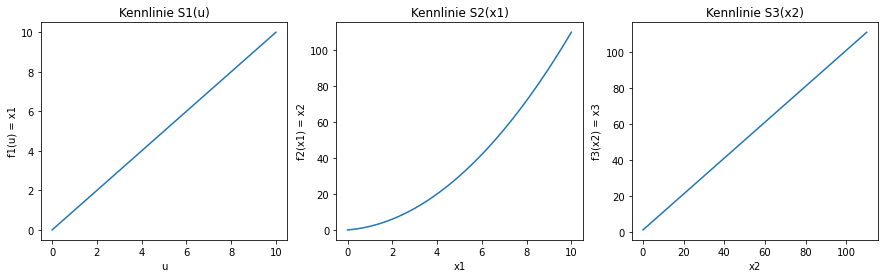

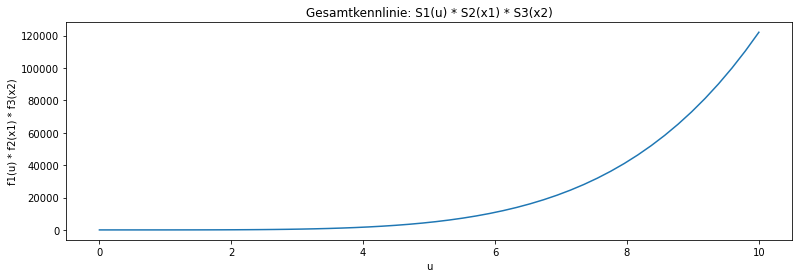

In [62]:
def f1(x):
    a_1 = .0
    b_1 = 1.0
    return b_1 * x + a_1

def f2(x):
    a_2 = 0.0
    b_2 = 1.0
    c_2 = 1.0
    return c_2 * x**2 + b_2 * x + a_2

def f3(x):
    a_3 = 1.0
    b_3 = 1.0
    return b_3 * x + a_3

start = 0.0
stop = 10.0
u = np.linspace(start, stop, num=50)

## Hintereinanderschaltung:
x1 = f1(u)
x2 = f2(x1)
x3 = f3(x2)

f, axs = plt.subplots(1,3,figsize=(15,4))
axs[0].plot(u, x1)
axs[0].set_xlabel('u')
axs[0].set_ylabel('f1(u) = x1')
axs[0].set_title('Kennlinie S1(u)')

axs[1].plot(x1, x2)
axs[1].set_xlabel('x1')
axs[1].set_ylabel('f2(x1) = x2')
axs[1].set_title('Kennlinie S2(x1)')

axs[2].plot(x2, x3)
axs[2].set_xlabel('x2')
axs[2].set_ylabel('f3(x2) = x3')
axs[2].set_title('Kennlinie S3(x2)')

plt.show()

## Gesamtkennlinie:
f, axs = plt.subplots(1,1,figsize=(13,4))
axs.plot(u, x1*x2*x3)
axs.set_xlabel('u')
axs.set_ylabel('f1(u) * f2(x1) * f3(x2)')
axs.set_title('Gesamtkennlinie: S1(u) * S2(x1) * S3(x2)')
plt.show()

### Herabsetzen des Messbereichs
<a id="SubSec-Herabsetzen_des_Messbereichs"></a>

Ziel ist es, eine möglichst optimale Kennlinie zu erhalten, welche einer Geraden entspricht. Dadurch entstehen auch die wenigsten Kennenlinienfehler, die noch im nächste Abschnitt erläutert werden. Am Beispiel des Dehnungsmessstreifens (DMSs) soll dies einmal erläutert werden. Ein DMS ist nur für kleine Ausrenkungen linear, das heißt er zeigt ein stark nicht-lineares Verhalten wenn er über 1 mm ausgelenkt wird. Die Idee ist nun, den DMS ausschließlich in diesem Bereich zu benutzen. Dafür wird eine weitere Komponente in der Messkette benötigt, die an den DMS angelegte Eingsangsgröße auf einem bestimmten Bereich limitiert. Sollen auch größere Auslenkungen als 1 mm gemessen werden, so wird diese Komponente außerdem dafür sorgen, dass eine Verminderung der Auslenkung statt findet. Dies kann beispielsweise über eine Blattfeder realisiert werden. Diese nimmt große Auslenkungen auf und projiziert sie auf kleine Auslenkungen (in nachfolgender Grafik verkörper durch eine Komponenten mit Empfindlichkeit $S_0$ << 1), die dann mittels DMS gemessen werden können. Damit die Messgröße unverändert bleibt, dürfen wir am Ende die Verstärkung ($S_1$ >> 1) nicht vergessen, sodass $S_0 \cdot S_1 = 1$. Dies nennt man auch *Kompensations-Bedingung*.  

![image.png](pictures/messbereich.png)

***
## Reale Kennlinienfunktion
<a id="Sec-Reale_Kennlinienfunktion"></a>

<div>
<img src="pictures/reale_kennlinie.png" align="right" width="400"/>
</div> 

Nun hängt allerdings der Verlauf einer Kennlinie nicht nur von der Herstellung ab, sondern auch von (äußeren) Einflusseffekten während des Messprozesses. 
Es hängt folglich immer von der Herstellung *und* Anwendung eines Messsystems ab, wie genau man wirklich messen kann. 
Womit wir beim einem anderen Aspekt unserer Betrachtungen wären, den *Messabweichungen*, die im nächsten Jupyter Notebook erläutert werden. 

Im nebenstehenden Bild ist eine ideale und eine reale Kennlinie gezeigt. Zu jeder Messgröße existiert eine Messabweichung. 
In der bereits zitierten einschlägigen deutschen Norm DIN 1319 wurde die früher hierfür enthaltene Bezeichnung *Fehler* bereits vor längerer Zeit durch *Abweichung* ersetzt. Der Grund liegt darin, dass im üblichen Sprachgebrauch unter einem *Fehler* eine Fehlfunktion eines technischen Systems verstanden wird, was hier jedoch nicht gemeint ist.
Für eine Messeinrichtung mit linearer Kennlinie sind demzufolge Empfindlichkeit $S$ und Übertragungsfunktion $k$ identisch.
Zu jeder Messgröße, $y$, existiert eine bestimmte Messabweichung, $A$, in Bezug auf ihren *realen* oder *idealen* Wert, $y_i$:

$$A = y - y_i$$

### Kennlinienfehler
<a id="SubSec-Kennlinienfehler"></a>

<div>
<img src="pictures/kennlinienfehler.png" align="right" width="400"/>
</div> 

Auf den grundsätzlichen Kennenlinienverlauf können durch verschiedene Einflusseffekte im Prinzip vier elementare Auswirkungen beobachtet werden. 
Es hängt dabei sehr stark von der konkreten Situation ab, ob ein einzelner Einflusseffekt sich primär in nur einer Art der Kennlinienabweichung zeigt oder in mehreren, d.h. es entstehen Abhängigkeiten zwischen den Komponenten. 
Auch wirken derartige Einflusseffekte meist auf jede einzelne Komponente eines Messsystems mit ihrer zugehörigen Einzelkennlinie. Summiert man alle diese Einflusseffekte auf alle Teilkomponenten auf, dann ergibt sich für ein konkretes Messsystem unter einer bestimmten Kombination und antahl von Störungen, eine ganz bestimmte *reale* Kennlinie. 

* **Nullpunktabweichung**: Dieser Kennlinienfehler ist additiv und somit absolute Messgeräteabweichung unabhängig von der Aussteuerung einer Messeinrichtung und wird auch Offset (-fehler) genannt. An jeder Stelle des Messbereiches wird eine Abweichung mit gleichem Betrag und Vorzeichen sowohl durch systematische, als auch durch zufällige Fehlerwirkungen verursacht. Die Beschreibung der *idealen* Übertragungsfunktion wird durch den additiven Fehler verändert. Man erkennt, dass der *relativer* Fehler für kleine Messwerte steigt, d.h. man möchte diese Messeinrichtungen möglichst groß aussteuern.
* **Multiplikativ**: Hierbei handelt es sich um eine absolute Abweichung der Anzeigegröße als Funktion ihrer Aussteuerung. Technisch wird dieser Fehlertyp auch als Verstärkungsfehler bezeichnet, d.h. man beobachtet unerwünschte Veränderung des Übertragungsfaktors, also die Verstärkung einer Messeinrichtung ändert sich! Auch der multiplikative Fehler kann systematische und zufällige Ursachen besitzen. Diese Art von Abweichungen verlaufen aber immer durch den Nullpunkt und sind daher eher tolerierbar, auch bei kleinen Aussteuerungen.
* **Nichtlineatität**: Die oben genannten zwei Fehlertypen werden bei realen Messeinrichtungen fast immer gleichzeitig auftreten. Überlagerung der beiden Kurven führt immer zu unerwünschten Nichtlinearitäten im System.
* **Hyterese**: Die Kennlinie unterscheidet sich, je nachdem ob die Messgröße ansteigt oder abfällt. Die Komponente hat damit gewissermaßen ein Gedächtnis. Hier sollte man sich einmal vor Augen führen, dass dies *nicht* bedeutet, dass das System zwei Kennlinien bestitzt. Es hat vielmehr unendlich viele Kennlinien, da die Kennlinie nicht nur von der Richtung, in die sich die Messgröße ändert, variiert, sondern sie hängt auch von der aktuellen Position der Messgröße ab. Je nachdem, von welchem Umkehrpunkt aus sich die Messgröße in die jeweils andere Richtung weiter bewegt, muss man eine andere Kennlinie erwarten. Dieses Verhalten beobachtet man häuft bei mechanischen Sensorkonstruktionen (Beispiel: Druckmembran in einem Drucksensor) oder wenn magnetische Werkstoffe verbaut sind. In reinen Analogelektroniken ist die Hysterese meist nicht relevant bzw. eher relativ gering ausgeprägt. 

Die digitale Signalverarbeitung ist von Kennlinienfehlern weitesgehend verschont und kann zusätzlich dazu benutzt werden, um eventuelle Kennlinienfehler zu komponsieren.

***
## Zusammenfassung
<a id="Sec-Zusammenfassung"></a>

| Begriff | Definition | 
| --- | --- |
| Empfindlichkeit | Das Verhältnis von Änderung der Ausgangsgröße zu der sie verursachenden Änderung der Eingangsgröße wird als Empfindlichkeit bezeichnet.| 
| Übertragungsfaktor | Er berechnet sich aus dem Quotienten von Ausgangsgröße zu Eingangsgröße eines  Übertragungssystems (Definition der Empfindlichkeit für ideale Kennlinien).| 
| Kennlinie | Über den gesamten Eingangsbereich der Messeinrichtung wird der Übertragungsfaktor durch die statische Kennlinie beschrieben.| 
| Ideale Kennlinie | Lineare, statische Kennlinie| 
| Messbereich (engl. range) | Garantierte Bereich, in dem das Messgerät gemäß Spezifikation korrekt arbeitet| 
| Spanne (engl. span) | Differenz zwischen Messbereichsende und Messbereichsbeginn| 
| Vollbereichssignal (engl. full scale output) | Ausgang, der mit der „Spanne“ der Messwerteingänge korreliert | 
| Kenngröße, statisch / stationär | Kenngrößen, die im eingeschwungenen Zustand einer Übertragungseinrichtung wirksam sind. | 
| Kenngröße, dynamisch | Kenngrößen, die das zeitabhängige Übertragungsverhalten beschreiben.| 